In [1]:
%config InlineBackend.figure_formats = ['svg']

In [6]:
import torch
from torch import nn
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [7]:
class NNDataset(Dataset):

    def __init__(self, func=torch.sin, begin=0, end=np.pi, size=10000) -> None:
        self.x = torch.FloatTensor(np.linspace(begin, end, size).reshape((size, 1)))
        self.t = func(self.x)

    def __len__(self):
        return self.x.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.t[index]

In [10]:
class Model(nn.Module):

    def __init__(self) -> None:
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 300),
            nn.Sigmoid(),
            nn.Linear(300, 100),
            nn.Sigmoid(),
            nn.Linear(100, 1),
            # nn.Sigmoid(),
        )

        # self.loss_function = nn.BCEWithLogitsLoss()
        # self.loss_function = nn.BCELoss()
        self.loss_function = nn.MSELoss()
        self.optimizer = torch.optim.Adam(self.parameters())
        # self.optimizer = torch.optim.SGD(self.parameters(), lr=0.1)

    def forward(self, x):
        return self.model(x)

In [13]:
epoch = 100
batch_size = 500

dataset = NNDataset(func=torch.exp, begin=-5, end=1, )
net = Model()

bar = tqdm(range(epoch))

generator = None

for e in bar:
    dataloader = DataLoader(
        dataset=dataset,
        batch_size=batch_size,
        shuffle=True,
        generator=generator,
    )

    for x, t in dataloader:
        y = net.forward(x)

        loss = net.loss_function(y, t)

        net.optimizer.zero_grad()

        loss.backward()

        net.optimizer.step()

        bar.set_postfix(dict(loss=f"{loss.item():0.2}",))


100%|██████████| 100/100 [00:19<00:00,  5.07it/s, loss=1.1e-05]


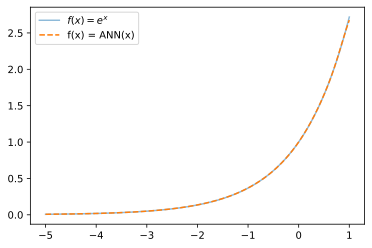

In [14]:
ax = plt.figure().add_subplot()
ax.plot(dataset.x.flatten(), dataset.t.flatten(), label='$f(x)=e^x$', alpha=0.5)
ax.plot(dataset.x.flatten(), net.forward(dataset.x).detach().flatten(), '--', label='f(x) = ANN(x)')
ax.legend()
plt.show()